In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from ipynb.fs.full.air_thermodynamic_properties import properties
from ipynb.fs.full.functions import i_sr, di_s, K_inc, K_M, K_p, K_Re, Y_p1, Y_p2
from ipynb.fs.full.functions import Y_p, Y_s, Y_TE, Y_sh, Y_EX, Y_CL, Y_LW
from ipynb.fs.full.functions import dh0_leak, dh0_DF, dh0_adm, dh0_gap
from ipynb.fs.full.turbine_design_functions import ND_Parameters, Velocity_Triangles, NOB
from ipynb.fs.full.turbine_design_functions import Section1, radius_section2, C_theta_2, Reaction, C_theta_4
from ipynb.fs.full.turbine_design_functions import radius_section4, Specifications2, Specifications4

# DATA

In [2]:
P01 = 2                           #bar
T01 = 900                         #kelvin
m_dot = 15                        #kg/sec
P04 = 1                           #bar
N_engine = 6000                   #RPM
R_u = 8.314                       #kj/kmol-k
R = R_u/28.9647                   #kj/kg-k

In [3]:
omega = 2*math.pi*N_engine/60   #rad/sec

# r_c

In [4]:
U_tip_min = 300                  #meter/sec
U_tip_max = 350                  #meter/sec

In [5]:
r_c = 0.5*(U_tip_min/omega)      #meter

In [6]:
r_c

0.238732414637843

# Non-Dimensional Parameters

In [7]:
R_c = 0.5
delta = 0.004         #meter

We can choose an arbitrary efficiency and by that We can extract phi_c and psi_c through related charts:

In [8]:
psi_c = (1.3+1.6)/2
phi_c = (0.8+1)/2
etta_target = 0.92

In [9]:
psi_c, phi_c

(1.4500000000000002, 0.9)

In [10]:
dic = ND_Parameters(psi_c, phi_c, delta, R_c, r_c)

In [11]:
dic

{'psi_opt': 1.1896652602685869,
 'phi_opt': 0.7375,
 'etta_opt': 0.9297453250000001,
 'etta_o': 0.9246291140625,
 'etta': 0.914614075929831}

In [12]:
etta_o = dic['etta_o']
etta = dic['etta']

In [13]:
etta, etta_o

(0.914614075929831, 0.9246291140625)

In [14]:
(abs(etta_target-etta)/etta_target) < 0.01 

True

This is showing that phi_c and psi_c are relatively appropriate and if We had any problem in next steps we can change them but now We can say, they are good

# Velocity Triangles

In [15]:
U_c = r_c*omega
alpha1_c = 90

In [16]:
VTriangles = Velocity_Triangles(U_c, phi_c, psi_c, R_c, alpha1_c)

In [17]:
VTriangles

,C_theta[meter/sec],Cm[meter/sec],C[meter/sec],alpha[degree],W_theta[meter/sec],W[meter/sec],Beta[degree]
Point 1,0.0,135.0,135.0,90,-,-,-
Point 2,183.75,135.0,228.011102,36.304497,33.75,139.154815,75.963757
Point 3,183.75,135.0,228.011102,36.304497,33.75,139.154815,75.963757
Point 4,-33.75,135.0,139.154815,-75.963757,-183.75,228.011102,-36.304497


In [18]:
C1_c = VTriangles['C[meter/sec]'][0]
C2_c = VTriangles['C[meter/sec]'][1]
C3_c = VTriangles['C[meter/sec]'][2]
C4_c = VTriangles['C[meter/sec]'][3]

In [19]:
C_theta2_c = VTriangles['C_theta[meter/sec]'][1]
C_theta3_c = VTriangles['C_theta[meter/sec]'][2]
C_theta4_c = VTriangles['C_theta[meter/sec]'][3]

In [20]:
Cm1_c = VTriangles['Cm[meter/sec]'][0]
Cm2_c = VTriangles['Cm[meter/sec]'][1]
Cm3_c = VTriangles['Cm[meter/sec]'][2]
Cm4_c = VTriangles['Cm[meter/sec]'][3]

In [21]:
W3_c = VTriangles['W[meter/sec]'][2]
W4_c = VTriangles['W[meter/sec]'][3]

In [22]:
alpha1_c = VTriangles['alpha[degree]'][0]
alpha2_c = VTriangles['alpha[degree]'][1]
alpha4_c = VTriangles['alpha[degree]'][3]

In [23]:
Beta1_c = VTriangles['Beta[degree]'][2]
Beta2_c = VTriangles['Beta[degree]'][3]

# Thermodynamic Properties at r_c

## Point 01

In [24]:
Properties01 = properties({'P' : P01, 'T' : T01})

In [25]:
Properties01

{'P[bar]': 2,
 'T[k]': 900,
 'C_p[kj/kg-k]': 1.1212168713986332,
 'h[kj/kg]': 937.5648948823913,
 's[kj/kg-k]': 6.851401920512807}

In [26]:
h01   = Properties01['h[kj/kg]']
h02_c = h01
h03   = h01
h04   = h01-(psi_c*U_c**2)/1000
h04ss = h01-(h01-h04)/etta_o
s1    = Properties01['s[kj/kg-k]']
s04ss = s1
s04id = s1

## Point 04ss

In [27]:
Properties04ss = properties({'h' : h04ss, 's' : s04ss})

In [28]:
Properties04ss

{'P[bar]': 1.7404165402678267,
 'T[k]': 868.4357262103506,
 'C_p[kj/kg-k]': 1.1142750704985729,
 'h[kj/kg]': 902.2804770506219,
 's[kj/kg-k]': 6.851401920512807}

In [29]:
P04 = Properties04ss['P[bar]']

## Point 04

In [30]:
Properties04 = properties({'h' : h04, 'P' : P04})

In [31]:
Properties04

{'P[bar]': 1.7404165402678267,
 'T[k]': 870.8146911519199,
 'C_p[kj/kg-k]': 1.1148076900465038,
 'h[kj/kg]': 904.9398948823913,
 's[kj/kg-k]': 6.854450885163198}

In [32]:
P04 = Properties04['P[bar]']
T04 = Properties04['T[k]']
s4 = Properties04['s[kj/kg-k]']
h04_c = Properties04['h[kj/kg]']
h04id = h04

## Point 04id

In [33]:
Properties04id = properties({'h' : h04id, 's' : s04id})

In [34]:
Properties04id

{'P[bar]': 1.7590019959014216,
 'T[k]': 870.8146911519199,
 'C_p[kj/kg-k]': 1.1148076900465038,
 'h[kj/kg]': 904.9398948823913,
 's[kj/kg-k]': 6.851401920512807}

In [35]:
P04id = Properties04id['P[bar]']
dP0_loss = P04id-P04

In [36]:
dP0_loss

0.018585455633594927

In [37]:
P02 = P01-dP0_loss/2

## Point 02

In [38]:
Properties02 = properties({'h' : h02_c, 'P' : P02})

In [39]:
Properties02

{'P[bar]': 1.9907072721832026,
 'T[k]': 899.9949916527546,
 'C_p[kj/kg-k]': 1.1212157926263546,
 'h[kj/kg]': 937.5648948823913,
 's[kj/kg-k]': 6.852732477034377}

In [40]:
s2_c = Properties02['s[kj/kg-k]']

## Point 1

In [41]:
h1_c = h01-(C1_c**2)/2000

In [42]:
Properties1 = properties({'h' : h1_c, 's' : s1})

In [43]:
Properties1

{'P[bar]': 1.9303595600516594,
 'T[k]': 891.8647746243739,
 'C_p[kj/kg-k]': 1.1194546755456563,
 'h[kj/kg]': 928.4523948823913,
 's[kj/kg-k]': 6.851401920512807}

In [44]:
P1 = Properties1['P[bar]']
T1 = Properties1['T[k]']
C_p1 = Properties1['C_p[kj/kg-k]']
gama1 = C_p1/(C_p1-R)

## Point 4

In [45]:
h4 = h04-(C4_c**2)/2000

In [46]:
Properties4 = properties({'h' : h4, 's' : s4})

In [47]:
Properties4

{'P[bar]': 1.6739882989901331,
 'T[k]': 862.1252086811352,
 'C_p[kj/kg-k]': 1.112855349128359,
 'h[kj/kg]': 895.2578636323913,
 's[kj/kg-k]': 6.854450885163198}

In [48]:
h4_c = Properties4['h[kj/kg]']
s4_c = Properties4['s[kj/kg-k]']
P4_c = Properties4['P[bar]']
T4_c = Properties4['T[k]']
rho4_c = P4_c*101.325/(R*T4_c)
C_p4 = Properties4['C_p[kj/kg-k]']
gama4 = C_p4/(C_p4-R)
M4_c = C4_c/((gama4*R*1000*T4_c)**0.5)
M_w4_c = W4_c/((gama4*R*1000*T4_c)**0.5)

## Point 2

In [49]:
h2_c = h02_c-(C2_c**2)/2000

In [50]:
Properties2 = properties({'h' : h2_c, 's' : s2_c})

In [51]:
Properties2

{'P[bar]': 1.7978170030482545,
 'T[k]': 876.7646076794658,
 'C_p[kj/kg-k]': 1.1161333852120963,
 'h[kj/kg]': 911.5703636323913,
 's[kj/kg-k]': 6.852732477034377}

In [52]:
h3 = h2_c
h3_c = h2_c
s3 = s2_c
P2_c = Properties2['P[bar]']
T2_c = Properties2['T[k]']
rho2_c = P2_c*101.325/(R*T2_c)
rho3_c = rho2_c
C_p2 = Properties2['C_p[kj/kg-k]']
gama2 = C_p2/(C_p2-R)
M2_c = C2_c/((gama2*R*1000*T2_c)**0.5)
M_w2_c = W3_c/((gama2*R*1000*T2_c)**0.5)

## Point 03rel

In [53]:
h03_rel = h3+(W3_c**2)/2000
s03_rel = s3

In [54]:
Properties03_rel = properties({'h' : h03_rel, 's' : s03_rel})

In [55]:
Properties03_rel

{'P[bar]': 1.8679270339279221,
 'T[k]': 885.4257095158598,
 'C_p[kj/kg-k]': 1.11804619264038,
 'h[kj/kg]': 921.2523948823913,
 's[kj/kg-k]': 6.852732477034377}

## Point 04_rel

In [56]:
h04_rel = h03_rel
s04_rel = s4

In [57]:
Properties04_rel = properties({'h' : h04_rel, 's' : s04_rel})

In [58]:
Properties04_rel

{'P[bar]': 1.856777777603247,
 'T[k]': 885.4257095158598,
 'C_p[kj/kg-k]': 1.11804619264038,
 'h[kj/kg]': 921.2523948823913,
 's[kj/kg-k]': 6.854450885163198}

## Table of Thermodynamic Properties at r_c

In [59]:
Properties = {
    'Point 1'             : Properties1,
    'Point 01'            : Properties01,
    'Point 2'             : Properties2,
    'Point 02'            : Properties02,
    'Point 3'             : Properties2,
    'Point 03_rel'        : Properties03_rel,
    'Point 4'             : Properties4,
    'Point 04_rel'        : Properties04_rel,
}

In [60]:
df = pd.DataFrame(Properties).T

In [61]:
df

,P[bar],T[k],C_p[kj/kg-k],h[kj/kg],s[kj/kg-k]
Point 1,1.930360,891.864775,1.119455,928.452395,6.851402
Point 01,2.000000,900.000000,1.121217,937.564895,6.851402
Point 2,1.797817,876.764608,1.116133,911.570364,6.852732
Point 02,1.990707,899.994992,1.121216,937.564895,6.852732
Point 3,1.797817,876.764608,1.116133,911.570364,6.852732
Point 03_rel,1.867927,885.425710,1.118046,921.252395,6.852732
Point 4,1.673988,862.125209,1.112855,895.257864,6.854451
Point 04_rel,1.856778,885.425710,1.118046,921.252395,6.854451


# Blade Height

In [62]:
Cm1_c = phi_c*U_c
rho1_c = P1*101.325/(R*T1)

In [63]:
h1 = m_dot/(2*math.pi*r_c*rho1_c*Cm1_c)

In [64]:
h1

0.09695080178187669

In [65]:
r_h1 = r_c-h1/2
r_s1 = r_c+h1/2

In [66]:
r_h1, r_s1

(0.19025701374690465, 0.28720781552878133)

# Number of Blades

## Stator

In [67]:
row = 'Stator'

By incidence = 0 We have:

In [68]:
alpha1_prime_c = alpha1_c

The turbine is a low-pressure turbine so We can choose aspect ratio like this:

In [69]:
h_c = 2

In [70]:
c = h1/h_c

In [71]:
c

0.048475400890938346

In [72]:
dic = NOB(alpha1_c, alpha2_c, alpha1_prime_c, row, c, r_c)

In [73]:
dic

{'NOB_AM': 36,
 's_AM': 0.04365452892616798,
 'NOB_zw': 40,
 's_zw': 0.037795447937002055}

In [74]:
NOB_s, s_s = dic['NOB_AM'], dic['s_AM']

In [75]:
NOB_s, s_s

(36, 0.04365452892616798)

## Rotor

In [76]:
Beta2_c = -Beta2_c
row = 'Rotor'

By incidence = 0 We have:

In [77]:
Beta1_prime_c = Beta1_c

In [78]:
Beta2_c

36.304497122575235

The turbine is a low-pressure turbine so We can choose aspect ratio like this:

In [79]:
h_c = 2

In [80]:
c = h1/h_c

In [81]:
c

0.048475400890938346

In [82]:
dic = NOB(Beta1_c, Beta2_c, Beta1_prime_c, row, c, r_c)

In [83]:
dic

{'NOB_AM': 37,
 's_AM': 0.04089789063801963,
 'NOB_zw': 45,
 's_zw': 0.03376311097266533}

In [84]:
NOB_r, s_r = dic['NOB_AM'], dic['s_AM']

In [85]:
NOB_r, s_r

(37, 0.04089789063801963)

# Velocity Triangles from Hub to Shroud

## Section 1

We need to create an array of different points on the blade at the interance of the turbine and stator and we need to consider this matter that this array shoud have an even number of arguments:

In [86]:
r_h1, r_c, r_s1

(0.19025701374690465, 0.238732414637843, 0.28720781552878133)

In [87]:
n = 99                        #number of points
m = int((n+1)/2)
p = m-1
r1_1 = np.linspace(r_h1, r_c, m)
r1_2 = np.linspace(r_c, r_s1, m)
r1 = np.array(list(r1_1)+list(r1_2[1:]))

For this section We wrote a function that gives the properties at every radius as output:

In [88]:
section1 = Section1(r1, Cm1_c, alpha1_c, R, Properties01, Properties1)

In [89]:
section1

{'P0[bar]': 2,
 'T0[k]': 900,
 'h0[kj/kg]': 937.5648948823913,
 's[kj/kg-k]': 6.851401920512807,
 'P[bar]': 1.9303595600516594,
 'T[k]': 891.8647746243739,
 'h[kj/kg]': 928.4523948823913,
 'rho[kg/m^3]': 0.7640377667090215}

## Section 2

We only can use Free Vortex, Exponential Vortex and Constant Nozzle Angle Vortex distributions to get a reasonable answer, so We have:

### Free Vortex

In [90]:
r2_FV, h2_FV, s2_FV, P2_FV, T2_FV, rho2_FV, C_theta2_FV, Cm2_FV, alpha2_FV, M2_FV, h_blade2_FV = Specifications2(
    m, C2_c, alpha2_c, r_c, h02_c, n, R, R_c, psi_c, U_c,
    omega, C_theta2_c, Cm1_c, rho1_c, r1, h1_c, h2_c,
    s2_c, P2_c, T2_c, rho2_c, Cm2_c, M2_c, 'FV'
)

In [91]:
dr_tip_stator_FV = r2_FV[-1]-r1[-1]
dr_hub_stator_FV = r1[0]-r2_FV[0]

In [92]:
C2_FV = (C_theta2_FV**2+Cm2_FV**2)**0.5
W_theta2_FV = C_theta2_FV-r2_FV*omega
W2_FV = (W_theta2_FV**2+Cm2_FV**2)**0.5
Beta2_FV = np.array([math.degrees(math.acos(item)) if item > 0 else -math.degrees(math.acos(item)) for item in (W_theta2_FV/W2_FV)])
M_w2_FV = W2_FV/(C2_FV/M2_FV)

In [93]:
dic1 = {
    'r2[meter]'      : r2_FV,
    'h2[kj/kg]'      : h2_FV,         
    'P2[bar]'        : P2_FV,      
    'T2[k]'          : T2_FV,    
    'rho2[kg/m^3]'   : rho2_FV,           
    'C_theta2[m/s]'  : C_theta2_FV,            
    'Cm2[m/s]'       : Cm2_FV,
    'C2[m/s]'        : C2_FV,
    'alpha2[degree]' : alpha2_FV,
    'M2'             : M2_FV,
    'W_theta2[m/s]'  : W_theta2_FV,
    'W2[m/s]'        : W2_FV,
    'Beta2[degree]'  : Beta2_FV,
    'M_w2'           : M_w2_FV,
}

In [94]:
pd.DataFrame(dic1)

,r2[meter],h2[kj/kg],P2[bar],T2[k],rho2[kg/m^3],C_theta2[m/s],Cm2[m/s],C2[m/s],alpha2[degree],M2,W_theta2[m/s],W2[m/s],Beta2[degree],M_w2
0,0.178932,902.441323,1.733441,868.574290,0.705793,245.023122,101.048571,265.041778,22.411458,0.457363,132.596570,166.711320,37.310130,0.287681
1,0.180432,902.687490,1.735149,868.794658,0.706246,242.987284,103.498742,264.111359,23.071242,0.455703,129.618255,165.870074,38.606978,0.286196
2,0.181932,902.932791,1.736858,869.015025,0.706700,240.984999,105.784865,263.180940,23.699969,0.454044,126.673491,165.035181,39.865212,0.284721
3,0.183432,903.177227,1.738569,869.235392,0.707153,239.015442,107.921056,262.250521,24.300288,0.452385,123.761457,164.206737,41.088708,0.283258
4,0.184832,903.404586,1.740203,869.445743,0.707576,237.206015,109.790364,261.382130,24.836971,0.450835,121.072384,163.439427,42.202241,0.281902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.289332,918.222008,1.845753,882.714524,0.739092,151.667237,125.231080,196.686995,39.546362,0.336843,-30.125681,128.803649,-103.526107,0.220587
95,0.290532,918.368132,1.846895,882.854758,0.739455,151.040583,124.820945,195.942660,39.570554,0.335543,-31.506317,128.735840,-104.166243,0.220454
96,0.291732,918.513702,1.847956,882.984975,0.739817,150.419086,124.404520,195.198325,39.592543,0.334245,-32.881796,128.676716,-104.805469,0.220338
97,0.292932,918.658718,1.849017,883.115192,0.740180,149.802682,123.981896,194.453990,39.612337,0.332948,-34.252182,128.626290,-105.443752,0.220236


### Exponential Vortex

In [95]:
r2_EV, h2_EV, s2_EV, P2_EV, T2_EV, rho2_EV, C_theta2_EV, Cm2_EV, alpha2_EV, M2_EV, h_blade2_EV = Specifications2(
    m, C2_c, alpha2_c, r_c, h02_c, n, R, R_c, psi_c, U_c,
    omega, C_theta2_c, Cm1_c, rho1_c, r1, h1_c, h2_c,
    s2_c, P2_c, T2_c, rho2_c, Cm2_c, M2_c, 'EV'
)

In [96]:
dr_tip_stator_EV = r2_EV[-1]-r1[-1]
dr_hub_stator_EV = r1[0]-r2_EV[0]

In [97]:
C2_EV = (C_theta2_EV**2+Cm2_EV**2)**0.5
W_theta2_EV = C_theta2_EV-r2_EV*omega
W2_EV = (W_theta2_EV**2+Cm2_EV**2)**0.5
Beta2_EV = np.array([math.degrees(math.acos(item)) if item > 0 else -math.degrees(math.acos(item))  for item in (W_theta2_EV/W2_EV)])
M_w2_EV = W2_EV/(C2_EV/M2_EV)

In [98]:
dic2 = {
    'r2[meter]'      : r2_EV,
    'h2[kj/kg]'      : h2_EV,         
    'P2[bar]'        : P2_EV,      
    'T2[k]'          : T2_EV,    
    'rho2[kg/m^3]'   : rho2_EV,           
    'C_theta2[m/s]'  : C_theta2_EV,            
    'Cm2[m/s]'       : Cm2_EV,
    'C2[m/s]'        : C2_EV,
    'alpha2[degree]' : alpha2_EV,
    'M2'             : M2_EV,
    'W_theta2[m/s]'  : W_theta2_EV,
    'W2[m/s]'        : W2_EV,
    'Beta2[degree]'  : Beta2_EV,
    'M_w2'           : M_w2_EV,
}

In [99]:
pd.DataFrame(dic2)

,r2[meter],h2[kj/kg],P2[bar],T2[k],rho2[kg/m^3],C_theta2[m/s],Cm2[m/s],C2[m/s],alpha2[degree],M2,W_theta2[m/s],W2[m/s],Beta2[degree],M_w2
0,0.184832,903.404586,1.740203,869.445743,0.707576,215.387234,148.084292,261.382130,34.509529,0.450835,99.253602,178.270118,56.168002,0.307483
1,0.185932,903.582696,1.741436,869.604341,0.707908,214.557131,148.086579,260.699823,34.613302,0.449620,97.732350,177.429555,56.576481,0.306007
2,0.187032,903.760341,1.742682,869.764608,0.708241,213.736788,148.073272,260.017515,34.713570,0.448404,96.220856,176.590336,56.983415,0.304533
3,0.188132,903.937520,1.743930,869.924875,0.708573,212.926032,148.044773,259.335208,34.810400,0.447189,94.718950,175.752481,57.388913,0.303062
4,0.189232,904.114233,1.745099,870.075125,0.708906,212.124698,148.001472,258.652901,34.903858,0.445976,93.226465,174.916007,57.793081,0.301595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.293632,918.743055,1.849588,883.185309,0.740391,163.447302,104.540232,194.019794,32.602817,0.332192,-21.047385,106.637950,-101.383345,0.182581
95,0.295032,918.911163,1.850814,883.335559,0.740814,163.027456,103.583363,193.151403,32.430805,0.330679,-22.346877,105.966486,-102.174295,0.181417
96,0.296432,919.078517,1.852040,883.485810,0.741237,162.611577,102.616918,192.283012,32.254197,0.329166,-23.642402,105.305247,-102.974246,0.180270
97,0.297832,919.245116,1.853253,883.634391,0.741660,162.199609,101.640760,191.414621,32.072903,0.327653,-24.934016,104.654428,-103.783333,0.179142


### Constant Nozzle Angle Vortex

In [100]:
r2_CNAV, h2_CNAV, s2_CNAV, P2_CNAV, T2_CNAV, rho2_CNAV, C_theta2_CNAV, Cm2_CNAV, alpha2_CNAV, M2_CNAV, h_blade2_CNAV = Specifications2(
    m, C2_c, alpha2_c, r_c, h02_c, n, R, R_c, psi_c, U_c,
    omega, C_theta2_c, Cm1_c, rho1_c, r1, h1_c, h2_c,
    s2_c, P2_c, T2_c, rho2_c, Cm2_c, M2_c, 'CNAV'
)

In [101]:
dr_tip_stator_CNAV = r2_CNAV[-1]-r1[-1]
dr_hub_stator_CNAV = r1[0]-r2_CNAV[0]

In [102]:
C2_CNAV = (C_theta2_CNAV**2+Cm2_CNAV**2)**0.5
W_theta2_CNAV = C_theta2_CNAV-r2_CNAV*omega
W2_CNAV = (W_theta2_CNAV**2+Cm2_CNAV**2)**0.5
Beta2_CNAV = np.array([math.degrees(math.acos(item)) if item > 0 else -math.degrees(math.acos(item)) for item in (W_theta2_CNAV/W2_CNAV)])
M_w2_CNAV = W2_EV/(C2_CNAV/M2_CNAV)

In [103]:
dic3 = {
    'r2[meter]'      : r2_CNAV,
    'h2[kj/kg]'      : h2_CNAV,         
    'P2[bar]'        : P2_CNAV,      
    'T2[k]'          : T2_CNAV,    
    'rho2[kg/m^3]'   : rho2_CNAV,           
    'C_theta2[m/s]'  : C_theta2_CNAV,            
    'Cm2[m/s]'       : Cm2_CNAV,
    'C2[m/s]'        : C2_CNAV,
    'alpha2[degree]' : alpha2_CNAV,
    'M2'             : M2_CNAV,
    'W_theta2[m/s]'  : W_theta2_CNAV,
    'W2[m/s]'        : W2_CNAV,
    'Beta2[degree]'  : Beta2_CNAV,
    'M_w2'           : M_w2_CNAV,
}

In [104]:
pd.DataFrame(dic3)

,r2[meter],h2[kj/kg],P2[bar],T2[k],rho2[kg/m^3],C_theta2[m/s],Cm2[m/s],C2[m/s],alpha2[degree],M2,W_theta2[m/s],W2[m/s],Beta2[degree],M_w2
0,0.184832,903.404586,1.740203,869.445743,0.707576,216.895121,145.866804,261.382130,33.921711,0.450835,100.761489,177.285087,55.364161,0.307483
1,0.185932,903.582696,1.741436,869.604341,0.707908,216.061348,145.883143,260.699823,34.026952,0.449620,99.236566,176.436355,55.774623,0.306007
2,0.187032,903.760341,1.742682,869.764608,0.708241,215.235668,145.885968,260.017515,34.129279,0.448404,97.719736,175.590041,56.184384,0.304533
3,0.188132,903.937520,1.743930,869.924875,0.708573,214.417955,145.875601,259.335208,34.228745,0.447189,96.210872,174.746167,56.593530,0.303062
4,0.189232,904.114233,1.745099,870.075125,0.708906,213.608086,145.852353,258.652901,34.325399,0.445976,94.709853,173.904759,57.002148,0.301595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.292832,918.646654,1.848854,883.095159,0.740149,160.958097,109.219834,194.516018,34.159273,0.333057,-23.033936,111.622284,-101.908893,0.182589
95,0.294132,918.803180,1.849997,883.235392,0.740542,160.495566,108.464757,193.709655,34.051282,0.331652,-24.313281,111.156373,-102.634476,0.181426
96,0.295432,918.959055,1.851141,883.375626,0.740935,160.036396,107.703444,192.903291,33.940295,0.330247,-25.589265,110.701591,-103.365101,0.180281
97,0.296732,919.114280,1.852272,883.514190,0.741328,159.580548,106.935863,192.096928,33.826272,0.328842,-26.861927,110.258069,-104.100754,0.179153


## Section 3

### Free Vortex

In [105]:
stagger = 13            #degree
b_x = c*math.cos(math.radians(stagger))
delta_x = 0.25*b_x

In [106]:
r3_FV = 0.25*(r2_FV-r1)+r2_FV

In [107]:
h3_FV, s3_FV, P3_FV, T3_FV, rho3_FV = h2_FV, s2_FV, P2_FV, T2_FV, rho2_FV
C_theta3_FV, Cm3_FV, alpha3_FV, M3_FV, h_blade3_FV = C_theta2_FV, Cm2_FV, alpha2_FV, M2_FV, r3_FV[-1]-r3_FV[0]

In [108]:
dr_tip_mid_FV = r3_FV[-1]-r2_FV[-1]
dr_hub_mid_FV = r2_FV[0]-r3_FV[0]

### Exponential Vortex

In [109]:
r3_EV = 0.25*(r2_EV-r1)+r2_EV

In [110]:
h3_EV, s3_EV, P3_EV, T3_EV, rho3_EV = h2_EV, s2_EV, P2_EV, T2_EV, rho2_EV
C_theta3_EV, Cm3_EV, alpha3_EV, M3_EV, h_blade3_EV = C_theta2_EV, Cm2_EV, alpha2_EV, M2_EV, h_blade2_EV

In [111]:
dr_tip_mid_EV = r3_EV[-1]-r2_EV[-1]
dr_hub_mid_EV = r2_EV[0]-r3_EV[0]

### Constant Nozzle Angle Vortex

In [112]:
r3_CNAV = 0.25*(r2_CNAV-r1)+r2_CNAV

In [113]:
h3_CNAV, s3_CNAV, P3_CNAV, T3_CNAV, rho3_CNAV = h2_CNAV, s2_CNAV, P2_CNAV, T2_CNAV, rho2_CNAV
C_theta3_CNAV, Cm3_CNAV, alpha3_CNAV, M3_CNAV, h_blade3_CNAV = C_theta2_CNAV, Cm2_CNAV, alpha2_CNAV, M2_CNAV, h_blade2_CNAV

In [114]:
dr_tip_mid_CNAV = r3_CNAV[-1]-r2_CNAV[-1]
dr_hub_mid_CNAV = r2_CNAV[0]-r3_CNAV[0]

## Section 4

## Free Vortex

In [115]:
r4_FV, h4_FV, h04_FV, s4_FV, P4_FV, T4_FV, rho4_FV, C_theta4_FV, Cm4_FV, alpha4_FV, M4_FV, h_blade4_FV = Specifications4(
    Cm3_FV, rho3_FV, C_theta3_FV, m, C4_c, alpha4_c, r_c, n, R,
    R_c, psi_c,U_c, omega, C_theta4_c, r3_FV, h3_c, h4_c,
    h04_c, s4_c, P4_c, T4_c, rho4_c, Cm4_c, M4_c, 'FV'
)

In [116]:
dr_tip_rotor_FV = r4_FV[-1]-r3_FV[-1]
dr_hub_rotor_FV = r3_FV[0]-r4_FV[0]

In [117]:
alpha4_FV = np.array([alpha4_FV[i] if C_theta4_FV[i] > 0 else -alpha4_FV[i]  for i in range(0, n)])
C4_FV = (C_theta4_FV**2+Cm4_FV**2)**0.5
W_theta4_FV = C_theta4_FV-r4_FV*omega
W4_FV = (W_theta4_FV**2+Cm4_FV**2)**0.5
Beta4_FV = np.array([math.degrees(math.acos(item)) if item > 0 else -math.degrees(math.acos(item))  for item in (W_theta4_FV/W4_FV)])
M_w4_FV = W4_FV/(C4_FV/M4_FV)

In [118]:
dic4 = {
    'r4[meter]'      : r4_FV,
    'h4[kj/kg]'      : h4_FV,         
    'P4[bar]'        : P4_FV,      
    'T4[k]'          : T4_FV,    
    'rho4[kg/m^3]'   : rho4_FV,           
    'C_theta4[m/s]'  : C_theta4_FV,            
    'Cm4[m/s]'       : Cm4_FV,
    'C4[m/s]'        : C4_FV,
    'alpha4[degree]' : alpha4_FV,
    'M4'             : M4_FV,
    'W_theta4[m/s]'  : W_theta4_FV,
    'W4[m/s]'        : W4_FV,
    'Beta4[degree]'  : Beta4_FV,
    'M_w4'           : M_w4_FV,
}

In [119]:
pd.DataFrame(dic4)

,r4[meter],h4[kj/kg],P4[bar],T4[k],rho4[kg/m^3],C_theta4[m/s],Cm4[m/s],C4[m/s],alpha4[degree],M4,W_theta4[m/s],W4[m/s],Beta4[degree],M_w4
0,0.174232,893.992135,1.665422,860.984975,0.684790,-46.217561,140.568336,147.971349,-108.200384,0.256398,-155.691016,209.759742,-137.922150,0.363462
1,0.175532,894.034220,1.665722,861.025042,0.684803,-45.875467,140.380882,147.686663,-108.097021,0.255899,-156.165736,209.986973,-138.046917,0.363848
2,0.176832,894.075197,1.666023,861.065109,0.684815,-45.538400,140.198605,147.408937,-107.994496,0.255412,-156.645483,210.222397,-138.171275,0.364248
3,0.178132,894.209504,1.666924,861.185309,0.684828,-45.206249,139.345530,146.494989,-107.974015,0.253812,-157.130146,210.016808,-138.432875,0.363867
4,0.179432,894.243925,1.667150,861.215359,0.684841,-44.878910,139.204252,146.259838,-107.869120,0.253400,-157.619621,210.289725,-138.550160,0.364334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.296832,895.732244,1.677221,862.554257,0.685990,-27.153147,132.958670,135.702989,-101.542367,0.234939,-213.658454,251.650438,-148.106186,0.435675
95,0.298132,895.741064,1.677296,862.564274,0.686003,-27.034707,132.916466,135.637983,-101.496915,0.234825,-214.356828,252.221404,-148.198146,0.436661
96,0.299432,895.749827,1.677296,862.564274,0.686016,-26.917295,132.874360,135.573362,-101.451837,0.234713,-215.056230,252.793943,-148.289794,0.437653
97,0.300732,895.758534,1.677372,862.574290,0.686029,-26.800899,132.832350,135.509120,-101.407129,0.234601,-215.756648,253.368042,-148.381129,0.438644


### Exponential Vortex

In [120]:
r4_EV, h4_EV, h04_EV, s4_EV, P4_EV, T4_EV, rho4_EV, C_theta4_EV, Cm4_EV, alpha4_EV, M4_EV, h_blade4_EV = Specifications4(
    Cm3_EV, rho3_EV, C_theta3_EV, m, C4_c, alpha4_c, r_c, n, R,
    R_c, psi_c,U_c, omega, C_theta4_c, r3_EV, h3_c, h4_c,
    h04_c, s4_c, P4_c, T4_c, rho4_c, Cm4_c, M4_c, 'EV'
)

In [121]:
dr_tip_rotor_EV = r4_EV[-1]-r3_EV[-1]
dr_hub_rotor_EV = r3_EV[0]-r4_EV[0]

In [122]:
alpha4_EV = np.array([alpha4_EV[i] if C_theta4_EV[i] > 0 else -alpha4_EV[i]  for i in range(0, n)])
C4_EV = (C_theta4_EV**2+Cm4_EV**2)**0.5
W_theta4_EV = C_theta4_EV-r4_EV*omega
W4_EV = (W_theta4_EV**2+Cm4_EV**2)**0.5
Beta4_EV = np.array([math.degrees(math.acos(item)) if item > 0 else -math.degrees(math.acos(item))  for item in (W_theta4_EV/W4_EV)])
M_w4_EV = W4_EV/(C4_EV/M4_EV)

In [123]:
dic5 = {
    'r4[meter]'      : r4_EV,
    'h4[kj/kg]'      : h4_EV,         
    'P4[bar]'        : P4_EV,      
    'T4[k]'          : T4_EV,    
    'rho4[kg/m^3]'   : rho4_EV,           
    'C_theta4[m/s]'  : C_theta4_EV,            
    'Cm4[m/s]'       : Cm4_EV,
    'C4[m/s]'        : C4_EV,
    'alpha4[degree]' : alpha4_EV,
    'M4'             : M4_EV,
    'W_theta4[m/s]'  : W_theta4_EV,
    'W4[m/s]'        : W4_FV,
    'Beta4[degree]'  : Beta4_EV,
    'M_w4'           : M_w4_EV,
}

In [124]:
pd.DataFrame(dic5)

,r4[meter],h4[kj/kg],P4[bar],T4[k],rho4[kg/m^3],C_theta4[m/s],Cm4[m/s],C4[m/s],alpha4[degree],M4,W_theta4[m/s],W4[m/s],Beta4[degree],M_w4
0,0.170032,894.729706,1.670447,861.654424,0.684749,-77.599669,119.994458,142.899890,-122.890497,0.247520,-184.434186,209.759742,-146.951628,0.381124
1,0.171632,894.744468,1.670522,861.664441,0.684764,-76.177925,120.779873,142.796547,-122.240329,0.247339,-184.017752,209.986973,-146.721146,0.381262
2,0.173232,894.759071,1.670598,861.674457,0.684780,-74.782429,121.528742,142.694242,-121.605967,0.247161,-183.627565,210.222397,-146.502537,0.381410
3,0.174832,894.773520,1.670748,861.694491,0.684796,-73.412461,122.243035,142.592948,-120.986717,0.246983,-183.262906,210.016808,-146.295268,0.381564
4,0.176332,894.787054,1.670824,861.704508,0.684811,-72.150682,122.881899,142.498007,-120.419525,0.246817,-182.943605,210.289725,-146.111027,0.381718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.296732,895.721684,1.677145,862.544240,0.685989,-12.522971,135.202059,135.780785,-95.291872,0.235075,-198.965445,251.650438,-145.802899,0.416469
95,0.298032,895.730138,1.677221,862.554257,0.686002,-12.141072,135.174362,135.718510,-95.132413,0.234966,-199.400361,252.221404,-145.866486,0.417063
96,0.299332,895.738534,1.677221,862.554257,0.686015,-11.762492,135.145720,135.656632,-94.974239,0.234858,-199.838595,252.793943,-145.930518,0.417663
97,0.300632,895.746874,1.677296,862.564274,0.686028,-11.387188,135.116152,135.595142,-94.817334,0.234751,-200.280105,253.368042,-145.994983,0.418266


### Constant Nozzle Angle Vortex

Unfortunately We Can not use this vortex distribution for section 4, because it needs tons of itterations!!! 

# Reaction

In [125]:
R_FV = (h2_FV-h4_FV)/(h1_c-h4_FV)
R_EV = (h2_EV-h4_EV)/(h1_c-h4_EV)

In [126]:
dic6 = {
    'R_FV' : R_FV,
    'R_EV' : R_EV
}

In [127]:
pd.DataFrame(dic6)

,R_FV,R_EV
0,0.245186,0.257242
1,0.251416,0.262200
2,0.257659,0.267153
3,0.261886,0.272099
4,0.267789,0.277056
...,...,...
94,0.687337,0.703357
95,0.691720,0.708418
96,0.696088,0.713459
97,0.700443,0.718479


So regarding the reaction factor and Mach number from hub to shroud, you can see that both of these methods are appropriate! 

# Efficiency

From now on We choose Free Vortex distribution, and We assume that alpha1_prime = alpha1, Beta3_prime = Beta3:

## Profile Loss

### Stator

In [128]:
s_stator = s_s                      #meter
c_stator = c                        #meter
s_c_stator = s_s/c     
NOB_stator = NOB_s    
alpha1_prime = alpha1_prime_c       #degree 
alpha2_prime = 90-56.74             #degree
stagger_stator = stagger            #degree  
t_max_over_c_stator = 0.15
s_Rc_stator = 0.2

In [129]:
Beta_1_prime_s = alpha1_prime
Beta1_s = alpha1_c
Beta2_s = alpha2_c
M_w1_s = C1_c/((gama1*R*1000*T1)**0.5)
M_w2_s = M2_c
rho2_stator = rho2_c                                                             #kg/m^3
Mu2 = (571.85-500)/(600-500)*(3.846-3.563)*10**(-5)+3.563*10**(-5)               #kg/m-sec for air at 571.85 centigrade
correctinon_fuel = 1.25
Mu2 *= correctinon_fuel                                                          #kg/m-sec
chord = c_stator
Re_c_s = (rho2_stator*C2_c*chord)/Mu2
e = 0
Re_e_s = (rho2_stator*C2_c*e)/Mu2
t_max_over_c_s = t_max_over_c_stator
O_s = 0.03
s_Rc_s = s_Rc_stator

In [130]:
Y_profile_stator = Y_p(Beta_1_prime_s, Beta1_s, Beta2_s, t_max_over_c_s, O_s, s_s, chord, M_w1_s, M_w2_s, Re_c_s, Re_e_s, s_Rc_s)

In [131]:
Y_p_stator = Y_profile_stator['Y_p']

### Rotor

In [132]:
s_rotor = s_r                 #meter  
c_rotor = c                   #meter   
s_c_rotor = s_r/c
NOB_rotor = NOB_r
Beta1_prime  = Beta1_prime_c      #degree      
Beta2_prime  = 90-56.74       #degree    
stagger_rotor  = 13.0         #degree 
t_max_over_c_rotor = 0.15
s_Rc_rotor = 0.2

In [133]:
Beta_1_prime_r = Beta1_prime
Beta1_r = Beta1_c
Beta2_r = Beta2_c
M_w1_r = M_w2_c
M_w2_r = M_w4_c
rho2_rotor = rho4_c                                                              #kg/m^3
Mu2 = (571.85-500)/(600-500)*(3.846-3.563)*10**(-5)+3.563*10**(-5)               #kg/m-sec for air at 571.85 centigrade
correctinon_fuel = 1.25
Mu2 *= correctinon_fuel                                                          #kg/m-sec
chord = c_rotor
Re_c_r = (rho2_rotor*W4_c*chord)/Mu2
e = 0
Re_e_r = (rho2_rotor*W4_c*e)/Mu2
t_max_over_c_r = t_max_over_c_rotor
O_r = 0.03
s_r = s_rotor
s_Rc_r = s_Rc_rotor

In [134]:
Y_profile_rotor = Y_p(Beta_1_prime_r, Beta1_r, Beta2_r, t_max_over_c_r, O_r, s_r, chord, M_w1_r, M_w2_r, Re_c_r, Re_e_r, s_Rc_r)

In [135]:
Y_p_rotor = Y_profile_rotor['Y_p']

## Secondary Loss

### Stator

In [136]:
K_Re_stator, K_p_stator = Y_profile_stator['K_Re'], Y_profile_stator['K_p']
chord = c
bx_stator = b_x
h_stator = h1
bx_h_stator = bx_stator/h_stator
h_c_stator = h_stator/chord

In [137]:
Y_s_stator = Y_s(K_Re_stator, K_p_stator, bx_h_stator, Beta_1_prime_s, Beta1_s, Beta2_s, s_c_stator, h_c_stator)

### Rotor

In [138]:
K_Re_rotor, K_p_rotor = Y_profile_rotor['K_Re'], Y_profile_rotor['K_p']
chord = c
bx_rotor = b_x
h_rotor = h_blade3_FV
bx_h_rotor = bx_rotor/h_rotor
h_c_rotor = h_rotor/chord

In [139]:
Y_s_rotor = Y_s(K_Re_rotor, K_p_rotor, bx_h_rotor, Beta_1_prime_r, Beta1_r, Beta2_r, s_c_rotor, h_c_rotor)

## Trailing Edge Loss

### Stator

In [140]:
t2_stator = 0.006    #meter

In [141]:
Y_TE_stator = Y_TE(O_s, s_s, t2_stator, rho2_stator, C2_c)

### Rotor

In [142]:
t2_rotor = 0.006    #meter

In [143]:
Y_TE_rotor = Y_TE(O_r, s_r, t2_rotor, rho2_rotor, W4_c)

## Sock Loss

### Stator

In [144]:
Y_sh_stator = Y_sh(M_w1_s, M_w2_s)

### Rotor

In [145]:
Y_sh_rotor = Y_sh(M_w1_r, M_w2_r)

## Supersonic Expansion Loss

### Stator

In [146]:
Y_EX_stator = Y_EX(M_w2_s)

### Rotor

In [147]:
Y_EX_rotor = Y_EX(M_w2_r)

## Blade Clearance Loss

### Stator

In [148]:
delta_stator = 0.004

In [149]:
Y_CL_stator = Y_CL(Beta1_s, Beta2_s, s_c_stator, h_c_stator, c, delta_stator) 

### Rotor

In [150]:
delta_rotor = 0.004

In [151]:
Y_CL_rotor = Y_CL(Beta1_r, Beta2_r, s_c_rotor, h_c_rotor, c, delta_rotor) 

## Lashing Wire Loss

### Stator

In [152]:
N_LW_stator = 1
D_LW_stator = 0.01   #meter
W2_stator = C2_c
Cm2_stator = Cm2_c

In [153]:
Y_LW_stator = Y_LW(N_LW_stator, D_LW_stator, Cm2_stator, rho2_stator, h_stator, W2_stator, Mu2)

### Rotor

In [154]:
N_LW_rotor = 1
D_LW_rotor = 0.01   #meter
W2_rotor = W4_c
Cm2_rotor = Cm4_c

In [155]:
Y_LW_rotor = Y_LW(N_LW_rotor, D_LW_rotor, Cm2_rotor, rho2_rotor, h_rotor, W2_rotor, Mu2)

## Table of Aerodynamic Losses

In [156]:
Aerodynamic_Losses_stator = {
    'Y_p'  : Y_p_stator,
    'Y_s'  : Y_s_stator,
    'Y_TE' : Y_TE_stator,
    'Y_sh' : Y_sh_stator,
    'Y_EX' : Y_EX_stator,
    'Y_CL' : Y_CL_stator,
    'Y_LW' : Y_LW_stator,
}

In [157]:
Aerodynamic_Losses_rotor = {
    'Y_p'  : Y_p_rotor,
    'Y_s'  : Y_s_rotor,
    'Y_TE' : Y_TE_rotor,
    'Y_sh' : Y_sh_rotor,
    'Y_EX' : Y_EX_rotor,
    'Y_CL' : Y_CL_rotor,
    'Y_LW' : Y_LW_rotor,
}

In [158]:
Aerodynamic_Losses = {
    'Stator' : Aerodynamic_Losses_stator,
    'Rotor'  : Aerodynamic_Losses_rotor,
}

In [159]:
df1 = pd.DataFrame(Aerodynamic_Losses).T

In [160]:
df1['Y_total'] = df1['Y_p']+df1['Y_s']+df1['Y_TE']+df1['Y_sh']+df1['Y_EX']+df1['Y_CL']+df1['Y_LW']

In [161]:
df1

,Y_p,Y_s,Y_TE,Y_sh,Y_EX,Y_CL,Y_LW,Y_total
Stator,0.012961,0.030467,0.0625,0.0,0.0,0.105491,0.036158,0.247577
Rotor,0.014693,0.033791,0.0625,0.0,0.0,0.113156,0.029271,0.253411


## Etta_tt

In [162]:
Y_nozzle = df1['Y_total'][0]
Y_rotor  = df1['Y_total'][1]

In [163]:
psi_nozzle = Y_nozzle/(1+0.5*gama2*M_w2_s**2)
psi_rotor = Y_rotor/(1+0.5*gama4*M_w2_r**2)

In [164]:
psi_nozzle

0.2243989935739521

In [165]:
psi_rotor

0.22932178796501307

In [166]:
T03 = T04
T3 = T4_c
T2 = T2_c
h03 = h04_c
etta_tt = (1+(T03/T3)*(psi_nozzle*(C2_c**2)*(T3/T2)+W4_c*psi_rotor)/(2000*(h01-h03)))**(-1)

In [167]:
etta_tt

0.8486155863375537

etta_target was 0.92 and at the end we achived to 0.84 efficiency

# Blade shape

## Free Vortex

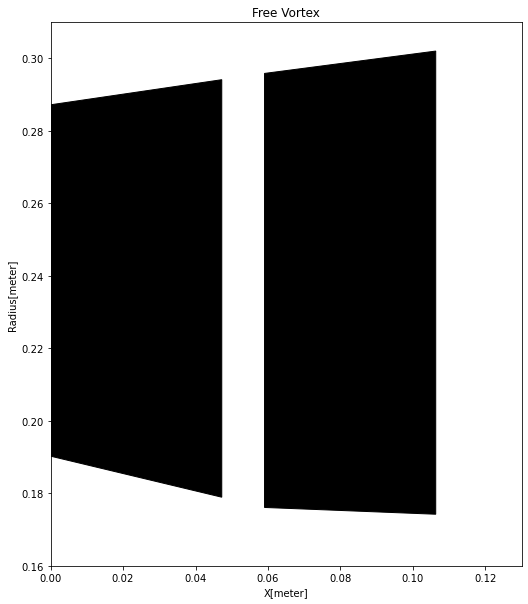

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 0.13)
ax.set_ylim(0.16, 0.31)

x = [0, 0, b_x, b_x, 0]
y = [r1[0], r1[-1], r2_FV[-1], r2_FV[0], r1[0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=True, color='black'))

x = [1.25*b_x, 1.25*b_x, 2.25*b_x, 2.25*b_x, 1.25*b_x]
y = [r3_FV[0], r3_FV[-1], r4_FV[-1], r4_FV[0], r3_FV[0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=True, color='black'))

plt.xlabel('X[meter]')
plt.ylabel('Radius[meter]')
plt.title('Free Vortex')

plt.rcParams["figure.figsize"] = (10, 10)